In [123]:
import numpy as np
import pandas as pd
import urllib2 
import datetime
import matplotlib
import requests
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/thisismetis/chi17_ds1/master/challenges/challenges_data/2013_movies.csv?token=AUYNYpyLTN4e8wiwXQABDTALOljrUJjKks5YlP0MwA%3D%3D')

In [124]:
df["ReleaseDate"] = pd.to_datetime(df["ReleaseDate"])

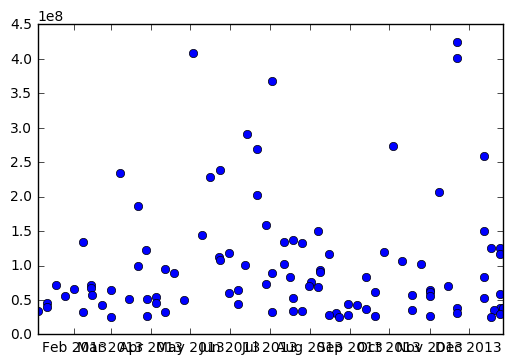

In [125]:
#challenge 1

x = df['ReleaseDate']
y = df['DomesticTotalGross']
plt.plot_date(x, y)

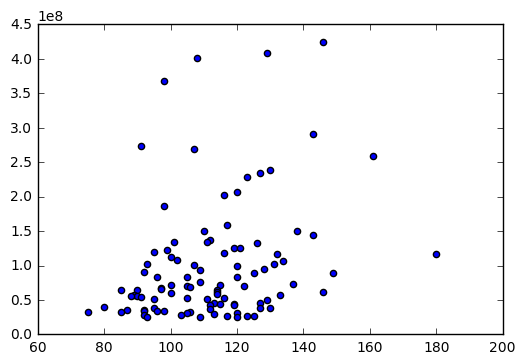

In [126]:
#challenge 2

y2 = df['DomesticTotalGross']
x2 = df['Runtime']
plt.scatter(x2,y2)

In [127]:
#challenge 3

grouped = df.groupby( ["Rating"] ).mean()
grouped.head()


,Budget,DomesticTotalGross,Runtime
Rating,,,
G,NaN,2.684928e+08,107.000000
PG,9.393333e+07,1.311357e+08,99.933333
PG-13,9.660976e+07,1.114498e+08,117.510638
R,3.886364e+07,6.989243e+07,110.729730


In [128]:
df.ReleaseDate[df['Rating'] == 'G']

6   2013-06-21
Name: ReleaseDate, dtype: datetime64[ns]

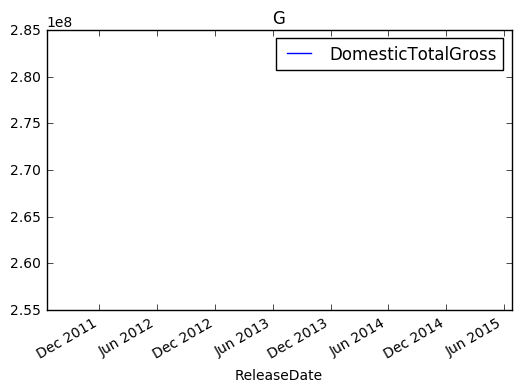

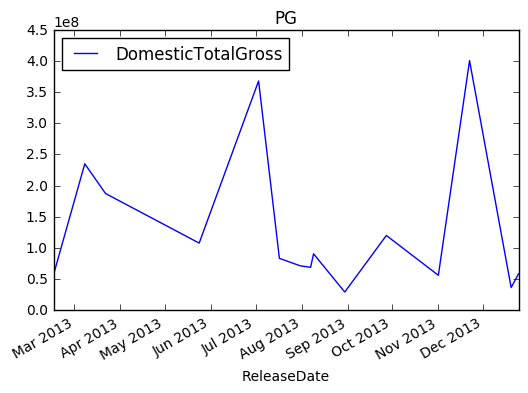

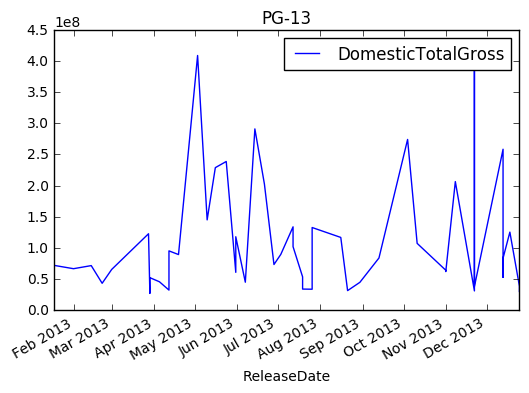

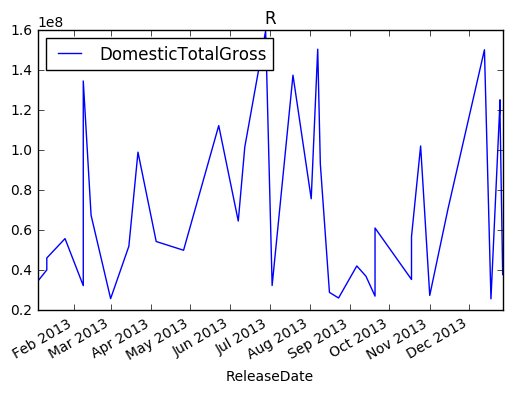

In [129]:
#challenge 4
#subplots
# subplots = ['df[df['Rating'] == 'G']', 'df[df['Rating'] == 'PG']', 'df[df['Rating'] == 'PG-13']', 'df[df['Rating'] == 'R']']

for i, group in df.groupby('Rating'):
    plt.figure()
    group.plot(x='ReleaseDate', y='DomesticTotalGross', title=str(i))



In [130]:
##Question 5

df3 = df.groupby('Director').mean()
print max(df3.DomesticTotalGross)
df3[df3['DomesticTotalGross'] == max(df3.DomesticTotalGross)].index

424668047.0


Index([u'Francis Lawrence'], dtype='object', name=u'Director')

In [132]:
#Question 6
#could not figure out how to get the std error for Domestic Total Gross


bins = range(1,13)
names = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

In [153]:
df.index=df['ReleaseDate']

df2 = df.groupby(pd.TimeGrouper(freq='M')).mean()

In [155]:
df2.DomesticTotalGross

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31'],
              dtype='datetime64[ns]', name=u'ReleaseDate', freq='M')

<Container object of 12 artists>

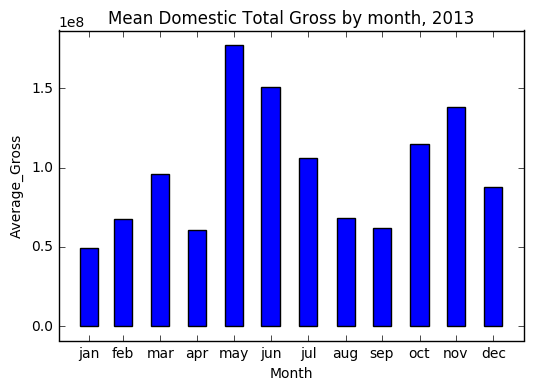

In [184]:
x = df2.index
y = df2.DomesticTotalGross
plt.xlabel('Month')
plt.ylabel('Average_Gross')
plt.title('Mean Domestic Total Gross by month, 2013')
plt.xticks(x,names)
plt.margins(.05)
plt.bar(x,y,width=15,align='center')